# Convolutional Neural Network in Keras

Computational Intelligence  - STRATEGOS  UNIGE

A. Cabri & F. Masulli


## Pre-requisites:

It is possible to run this notebook locally on a jupyter installation, but we recommend to run this this notebook in the cloud on Google Colab <a target="_blank" href="http://colab.research.google.com/"><img src="https://deeplearning.mit.edu/files/images/github/icon_google_colab.png" style="padding-bottom:5px;" height="18"/></a> because it is possible to test the execution both on the standard CPU kernel and on a GPU powered one.

You can switch between them by selecting the following menuitems: Edit $\rightarrow$ Notebook settings $\rightarrow$ Hardware accelerator

Local execution requires to [install TensorFlow](https://www.tensorflow.org/install/), which is not always an easy task due to different version of dependent libraries, and [tf.keras](https://www.tensorflow.org/guide/keras) which
is TensorFlow's high-level API for building and training deep learning models. 

You may find detailed documentation at Keras Guide (https://keras.io/)  or   (https://www.tensorflow.org/guide/keras).

## Required imports:

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys
import time

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.4.1


## Download MNIST dataset 

The MNIST dataset contains 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. 

The *labels* are an array of integers, ranging from 0 to 9.

The dataset can be downloaded from this repository:

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


Let's convert the image pixels into a range of 0 to 1 before feeding to the neural network model by dividing the values of both the *training set* and the *testing set* by 255.

In [3]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first *count* images from the *training set* and display the class name below each image. 

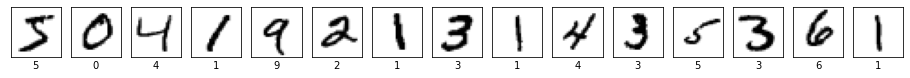

In [4]:
count = 15
plt.figure(figsize=(16,1))
for i in range(count):
    plt.subplot(1,count,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. Here follows one possible configuration that produces good results on the MNIST dataset:

In [5]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [6]:
model.compile(optimizer=tf.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

Being in a context of *supervised learning*, training the neural network model requires to call the `model.fit` method on the training data `train_images` and the relevant ground truth `train_labels`.

To make predictions we use a test set `test_images` and check the predictions against the `test_labels` array. 

In [7]:
print(train_images.shape)
t_before = time.time() 
model.fit(train_images, train_labels, epochs=15)
t_after = time.time()
t_training = t_after - t_before
print()
print("Total  training time (seconds):", t_training)

(60000, 28, 28, 1)
Epoch 1/15
1875/1875 [==============================] - 72s 38ms/step - loss: 0.9299 - accuracy: 0.7026
Epoch 2/15
1875/1875 [==============================] - 95s 51ms/step - loss: 0.3134 - accuracy: 0.9069
Epoch 3/15
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2319 - accuracy: 0.9318
Epoch 4/15
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1803 - accuracy: 0.9468
Epoch 5/15
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1442 - accuracy: 0.9576
Epoch 6/15
1875/1875 [==============================] - 89s 48ms/step - loss: 0.1244 - accuracy: 0.9633
Epoch 7/15
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1109 - accuracy: 0.9661
Epoch 8/15
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0974 - accuracy: 0.9702
Epoch 9/15
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0912 - accuracy: 0.9731
Epoch 10/15
1875/1875 [====================

### Evaluate generalization accuracy

Model performance is assessed on the test dataset:

In [8]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

'Test accuracy: {:.2f} %'.format(test_acc*100)

(10000, 28, 28, 1)
313/313 [==============================] - 4s 13ms/step - loss: 0.0349 - accuracy: 0.9880


'Test accuracy: 98.80 %'

Most often, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. In our case, the accuracy is better, due to successful regularization accomplished with the Dropout layers.